### Get data

In [1]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format

df = pd.read_excel('./cleaned/JaxByCoByYear.xlsx')
df['listing_office_group'] = df.listing_office_group.str.strip()
df.head()

,listing_office_group,2019,2020,2021,2022,2023
0,WATSON REALTY CORP,"4,506.00","3,666.00","3,315.00","2,657.00","1,997.00"
1,KELLER WILLIAMS,"3,531.00","3,433.00","3,091.00","2,901.00","2,712.00"
2,FLORIDA HOMES REALTY,"2,408.00","2,451.00","2,720.00","2,721.00","2,092.00"
3,COLDWELL BANKER,"2,565.00","2,355.00","2,216.00","1,859.00","1,467.00"
4,D R HORTON,"1,476.00","2,088.00","2,443.00","2,057.00","1,109.00"


### Add 5yr change %

In [2]:
df['5yr'] = (df[2023] - df[2019]) / df[2019] * 100
df

,listing_office_group,2019,2020,2021,2022,2023,5yr
0,WATSON REALTY CORP,"4,506.00","3,666.00","3,315.00","2,657.00","1,997.00",-55.68
1,KELLER WILLIAMS,"3,531.00","3,433.00","3,091.00","2,901.00","2,712.00",-23.19
2,FLORIDA HOMES REALTY,"2,408.00","2,451.00","2,720.00","2,721.00","2,092.00",-13.12
3,COLDWELL BANKER,"2,565.00","2,355.00","2,216.00","1,859.00","1,467.00",-42.81
4,D R HORTON,"1,476.00","2,088.00","2,443.00","2,057.00","1,109.00",-24.86
...,...,...,...,...,...,...,...
159,WJH BROKERAGE FL,NaN,NaN,3.00,116.00,50.00,NaN
160,HOMECOOM,NaN,NaN,59.00,28.00,34.00,NaN
161,DOOR INVESTMENT ADVISORS,NaN,NaN,89.00,26.00,10.00,NaN
162,SALT RUN REAL ESTATE,NaN,NaN,118.00,5.00,7.00,NaN


Bottom 10 by 5yr change<br>
*for companies that existed in 2019 and 2023

In [3]:
df.sort_values(by='5yr').head(10)

,listing_office_group,2019,2020,2021,2022,2023,5yr
10,DREAM FINDERS REALTY,590.00,489.00,408.00,119.00,1.00,-99.83
64,THE SIMMONS LAND GROUP,99.00,83.00,2.00,1.00,2.00,-97.98
70,MARSH LANDING COUNTRY CLUB REALTY,66.00,75.00,87.00,61.00,3.00,-95.45
43,REDZONE REALTY,84.00,133.00,130.00,108.00,4.00,-95.24
139,LA ROSA REALTY,72.00,13.00,14.00,4.00,5.00,-93.06
103,GPS REALTY,67.00,51.00,7.00,17.00,8.00,-88.06
133,AVH NORTH FLORIDA,57.00,22.00,114.00,54.00,7.00,-87.72
142,MASH REALTY SERVICES,113.00,10.00,14.00,8.00,15.00,-86.73
82,ERA HEAVENER REALTY,60.00,66.00,66.00,67.00,10.00,-83.33
8,LENNAR,549.00,552.00,37.00,118.00,104.00,-81.06


Top 10 by 5yr change<br>
*for companies that existed in 2019 and 2023

In [4]:
top10gainers = df.sort_values(by='5yr', ascending=False).dropna().head(10)
top10gainers.to_excel('./cleaned/FastestGrowing.xlsx', index=False)
top10gainers

,listing_office_group,2019,2020,2021,2022,2023,5yr
76,HERRON REAL ESTATE,2.00,69.00,263.00,458.00,427.00,"21,250.00"
126,OCCUPY REAL ESTATE GROUP,1.00,29.00,46.00,69.00,52.00,"5,100.00"
21,MOMENTUM REALTY,12.00,336.00,532.00,600.00,612.00,"5,000.00"
137,UNITED REAL ESTATE,20.00,15.00,11.00,19.00,907.00,"4,435.00"
84,THE THAYVER GROUP,1.00,65.00,39.00,63.00,41.00,"4,000.00"
131,RESIDENTIAL MOVEMENT REAL ESTATE GROUP,2.00,25.00,64.00,60.00,53.00,"2,550.00"
98,EXIT INSPIRED REAL ESTATE,4.00,54.00,61.00,84.00,89.00,"2,125.00"
108,CHAD AND SANDY REAL ESTATE GROUP,13.00,45.00,57.00,184.00,181.00,"1,292.31"
100,BEYCOME OF FLORIDA,20.00,53.00,122.00,163.00,192.00,860.00
59,PINEYWOODS REALTY,12.00,87.00,89.00,120.00,114.00,850.00


Companies that didn't make it to 2023

In [5]:
df.loc[(~df[2019].isnull())&(df[2023].isnull())].sort_values(by=2019, ascending=False)

,listing_office_group,2019,2020,2021,2022,2023,5yr
7,EXIT REAL ESTATE GALLERY,"1,442.00","1,392.00","1,456.00","1,029.00",NaN,NaN
32,MAGNOLIA PROPERTIES,210.00,175.00,15.00,NaN,NaN,NaN
33,PREMIER COAST REALTY,205.00,165.00,110.00,20.00,NaN,NaN
85,AMELIA ISLAND REAL ESTATE SALES,135.00,65.00,NaN,NaN,NaN,NaN
143,INI REALTY INVESTMENTS,130.00,6.00,NaN,NaN,NaN,NaN
24,FLORIDA REALTY HUB,117.00,237.00,34.00,NaN,NaN,NaN
135,YELLOWFIN REALTY GROUP,82.00,20.00,NaN,NaN,NaN,NaN
57,PABLO CREEK REAL ESTATE,73.00,89.00,42.00,10.00,NaN,NaN
134,OWNERSCOM,72.00,21.00,1.00,NaN,NaN,NaN
106,EDGEWATER COMPANIES,67.00,50.00,41.00,NaN,NaN,NaN


In [6]:
df.loc[df.listing_office_group.str.contains('UNITED')]

,listing_office_group,2019,2020,2021,2022,2023,5yr
137,UNITED REAL ESTATE,20.00,15.00,11.00,19.00,907.00,"4,435.00"


EXIT Real Estate Gallery acquired by Dallas-based United Real Estate and will operate as United Real Estate Gallery: https://therealdeal.com/texas/dallas/2022/10/06/united-real-estate-adds-another-brokerage-to-its-stable/

Companies that weren't around in 2019 but are in 2023

In [7]:
df.loc[(df[2019].isnull())&(~df[2023].isnull())].sort_values(by=2023, ascending=False)

,listing_office_group,2019,2020,2021,2022,2023,5yr
147,THE REALTY EXPERIENCE POWERED,NaN,NaN,NaN,NaN,190.00,NaN
148,LGI REALTY - FLORIDA,NaN,NaN,NaN,NaN,187.00,NaN
149,MARK SPAIN REAL ESTATE,NaN,NaN,26.00,288.00,167.00,NaN
102,OFFERPAD,NaN,51.00,354.00,516.00,164.00,NaN
140,SLATE REAL ESTATE,NaN,10.00,98.00,146.00,128.00,NaN
150,YELLOWBIRD REALTY,NaN,NaN,NaN,223.00,105.00,NaN
151,IRON VALLEY REAL ESTATE NORTH FLORIDA,NaN,NaN,NaN,40.00,103.00,NaN
152,CASTILLO REAL ESTATE JAX,NaN,NaN,NaN,21.00,95.00,NaN
153,CENTURY COMMUNITIES OF FLORIDA,NaN,NaN,NaN,4.00,89.00,NaN
154,YOUR HOME SOLD GUARANTEED REALTY ADVISORS,NaN,NaN,11.00,43.00,58.00,NaN


iBuyers

In [8]:
ibuyers = df.loc[df.listing_office_group.isin(['OFFERPAD', 'OPENDOOR', 'ZILLOW'])]
ibuyers.to_excel('./cleaned/iBuyers.xlsx', index=False)
ibuyers

,listing_office_group,2019,2020,2021,2022,2023,5yr
28,OPENDOOR,442.00,216.00,733.00,999.00,233.00,-47.29
102,OFFERPAD,NaN,51.00,354.00,516.00,164.00,NaN
163,ZILLOW,NaN,NaN,76.00,55.00,NaN,NaN


Builders

In [9]:
builders = df.loc[df.listing_office_group.isin(['D R HORTON', 'LENNAR', 'CENTURY COMMUNITIES OF FLORIDA', 'PULTE REALTY OF NORTH FLORIDA', 'LGI REALTY - FLORIDA',
                                     'MATTAMY REAL ESTATE SERVICES', 'DREAM FINDERS REALTY'])]
builders.to_excel('./cleaned/Builders.xlsx', index=False)
builders

,listing_office_group,2019,2020,2021,2022,2023,5yr
4,D R HORTON,"1,476.00","2,088.00","2,443.00","2,057.00","1,109.00",-24.86
8,LENNAR,549.00,552.00,37.00,118.00,104.00,-81.06
10,DREAM FINDERS REALTY,590.00,489.00,408.00,119.00,1.00,-99.83
23,MATTAMY REAL ESTATE SERVICES,184.00,252.00,319.00,268.00,182.00,-1.09
54,PULTE REALTY OF NORTH FLORIDA,93.00,92.00,85.00,195.00,99.00,6.45
148,LGI REALTY - FLORIDA,NaN,NaN,NaN,NaN,187.00,NaN
153,CENTURY COMMUNITIES OF FLORIDA,NaN,NaN,NaN,4.00,89.00,NaN


In [10]:
### Special
# df.loc[df.listing_office_group.str.contains('DJ & LINDSEY')]

Fates of different offices within brand

In [11]:
offices = ['ENGEL & VOLKERS FIRST COAST',
'ENGEL & VOLKERS JACKSONVILLE',
'ENGEL & VOLKERS ST AUGUSTINE',
'ENGEL & VOLKERS GAINESVILLE',
'ENGEL & VOLKERS AMELIA ISLAND',
'ENGEL & VOLKERS']

ev = pd.read_csv('./raw/JaxMLS.csv')
ev = ev.loc[ev.geographic=='Jacksonville, FL']
ev['listing_office_name'] = ev.listing_office_name.str.upper().str.strip()
ev = ev.loc[ev.listing_office_name.isin(offices)]
ev.reset_index(inplace=True, drop=True)
ev = ev[['listing_year', 'total_listings', 'listing_office_id']].groupby(['listing_year', 'listing_office_id']).sum()
ev

total_listings
listing_year listing_office_id                
2019         F64762                        296
             F65916                          5
             F66411                          8
2020         F64762                        328
             F65916                         18
             F66411                         83
             S264000987                      1
2021         ENGEL                         102
             F64762                        405
             F65916                         15
             F66238                          2
             F66411                        281
             F67938                          8
             S264000987                      2
2022         270531871                       1
             282570628                       1
             ENGEL                          86
             F64762                        380
             F65916                         27
             F66238                          2
             F66411                        254
             F67938                         32
             F68014                          6
2023         264000987                       2
             270531871                       4
             ENGEL                         169
             F64762                        418
             F65916                         22
             F66238                          2
             F66411                        225
             F67938                         60
             F68014                         48

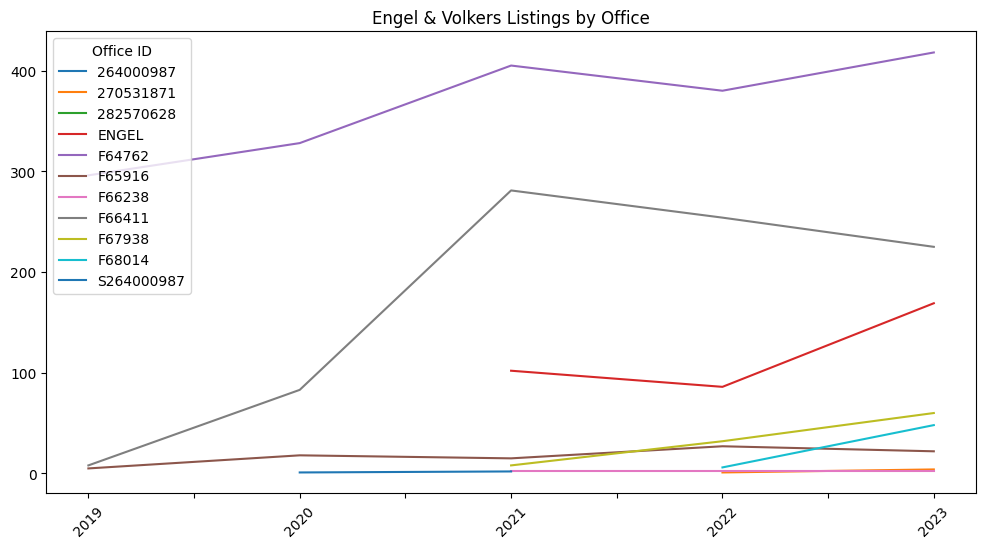

In [12]:
forPlt = ev.reset_index()
forPlt.columns.name = None 
forPlt['listing_year'] = forPlt.listing_year.astype('str')
forPlt.rename(columns={'listing_office_id':'Office ID'}, inplace=True)
forPlt.sort_values(by=['listing_year', 'total_listings'], inplace=True)
_ = forPlt.pivot(columns='Office ID', index='listing_year', values='total_listings').plot(
    title='Engel & Volkers Listings by Office',
    xlabel='',
    figsize=(12,6),
    kind='line',
    rot=45
)